# Task # 4 - To Explore Decision Tree Algorithm

**Task:** For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

## Decision Tree
- A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.  
- The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. 
- This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. 
- That is why decision trees are easy to understand and interpret.
- Decision Tree is one of the easiest and popular classification algorithms to understand and interpret.  
- It can be utilized for both classification and regression kind of problem.

## Index
1. Importing Libraries And Data
2. Exploring the Data
3. Preparing the data
4. Building Decision Tree Model(Criteria= 'gini')
5. Evaluating Model
6. Visualizing Decision Trees
7. Building Decision Tree Model(Criteria= 'entropy')
8. Visualizing Decision Trees
9. Predictiong class for new data

# 1. Importing Libraries And Data

In [67]:
# importing the libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [51]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [52]:
y=iris.target
print(y)
target_name=iris.target_names
print(target_name)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# 2. Exploring the Data

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df.shape

(150, 4)

In [55]:
# The statistical details of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


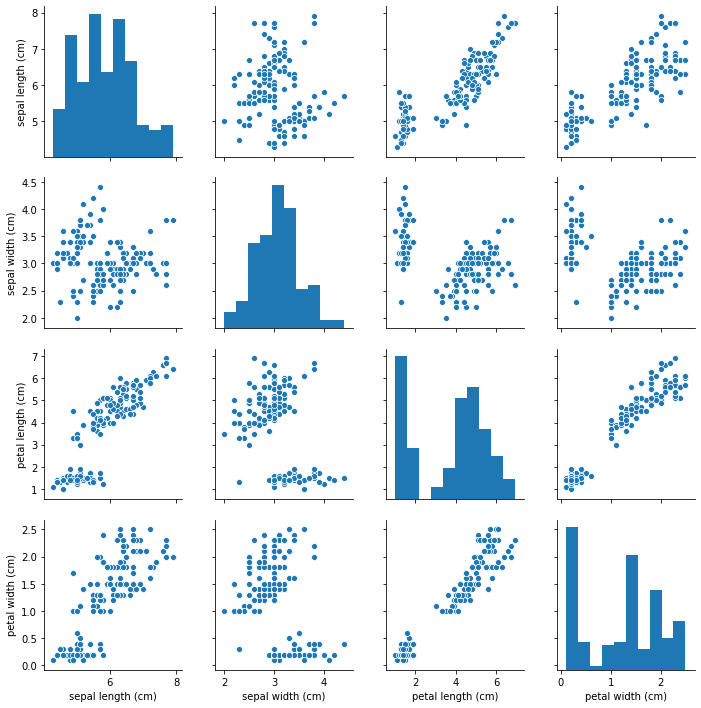

In [56]:
sns.pairplot(df)

# 3. Preparing the data

In [57]:
## Splitting Data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1) # 70% training and 30% test

# 4. Building Decision Tree Model(Criteria= 'gini')

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# 5. Evaluating Model

In [80]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [82]:
# confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1,2
row_0,,,
0,14,0,0
1,0,17,1
2,0,1,12


# 6. Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [60]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

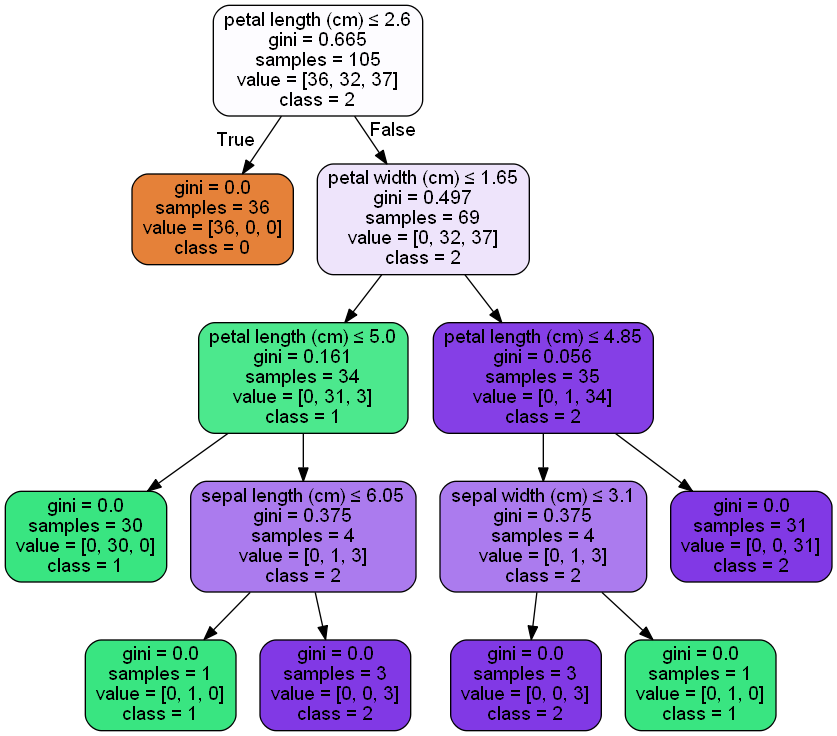

In [61]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# 7. Building Decision Tree Model(Criteria= 'entropy')

In [74]:
# Create Decision Tree classifer object: as default creiteris is "gini"
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


# 8. Visualizing Decision Trees

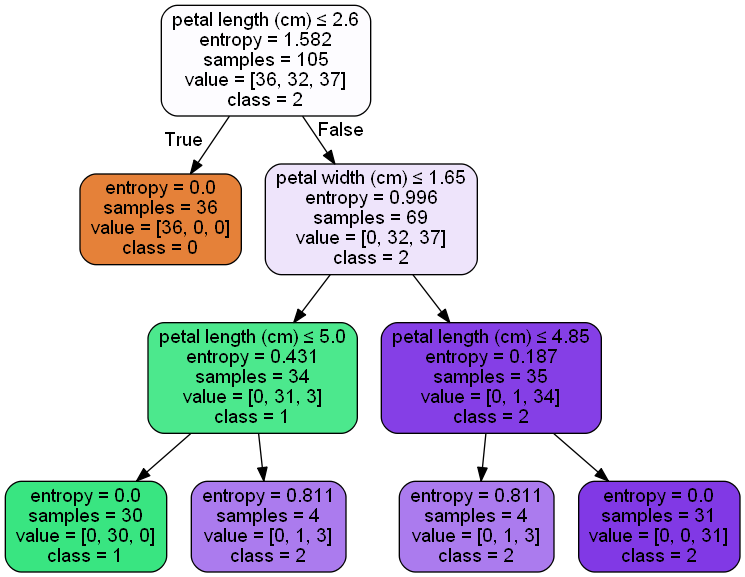

In [75]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

# 9. Predictiong class for new data

In [86]:
# let we randomly assume values as, sepal length (cm)=4.75,  sepal width (cm)=3.25,  petal length (cm)=1.35,  petal width (cm)=0.22
y_pred_new = clf.predict([[4.75, 3.25, 1.35, .022]])
print("Predicted class is:",y_pred_new,target_name[y_pred_new])

Predicted class is: [0] ['setosa']


45